In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud
from nltk import bigrams 
 
from collections import Counter
import re

In [2]:
dates = []

In [3]:
with open('data/stream_wexvwat.json') as f:
    for line in f:
        line = line.strip()
        if line:
            tweet = json.loads(line)
            dates.append(tweet['created_at'])

In [4]:
ones = [1]*len(dates)
idx = pd.DatetimeIndex(dates)
dates_df = pd.Series(ones, idx)

In [5]:
per_minute = dates_df.resample('1Min').sum().fillna(0)

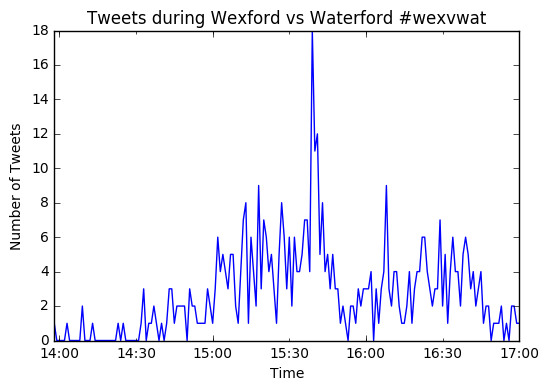

In [6]:
plt.figure()
per_minute.plot()
plt.title("Tweets during Wexford vs Waterford #wexvwat")
plt.ylabel("Number of Tweets")
plt.xlabel("Time")
#plt.gcf().autofmt_xdate()
plt.show()

Want to extract text from tweets and do a wordcloud plot

In [7]:
tknr = TweetTokenizer()

In [8]:
tweets = []

In [9]:
with open('data/stream_wexvwat.json') as f:
    for line in f:
        line = line.strip()
        if line:
            tweets.append(json.loads(line))           

In [10]:
import nltk.stem.snowball

In [11]:
stemmer = nltk.stem.snowball.SnowballStemmer('english')

In [12]:
punctuation = list(string.punctuation)

In [13]:
stop = stopwords.words('english') + punctuation + ['rt', 'via' , 'wexford', 'waterford','thesundaygame', 'hurling']

In [14]:
tokens = []
for tweet in tweets:
    tokens.append(tknr.tokenize(tweet['text'].lower()))

In [15]:
terms_stop = []
for i in tokens:
    for j in i:
        if j not in stop and not j.startswith(('http', '#', '@')):
            terms_stop.append(j)

In [16]:
words = ''
for i in terms_stop:
    words = words + i + ' '

In [17]:
wordcloud = WordCloud(width=600, height=400).generate(words)

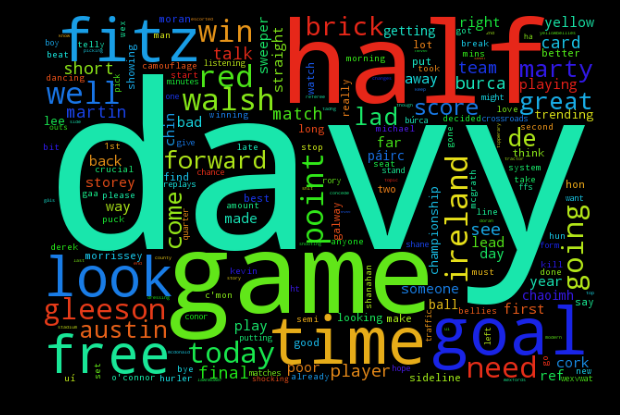

In [18]:
#Word cloud
plt.figure(facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("wexvwat.png")

In [19]:
wordcloud.to_file("figures/wecxvwat_wordcloud.png")

In [20]:
search = []

In [22]:
with open('data/search_watvwex.json') as f:
    for line in f:
        line = line.strip()
        if line:
            search.append(json.loads(line))       

In [23]:
for tweet in search:
    tokens.append(tknr.tokenize(tweet['text'].lower()))

In [24]:
terms_stop = []
for i in tokens:
    for j in i:
        if j not in stop and not j.startswith(('http', '#', '@')):
            terms_stop.append(j)

In [25]:
words = ''
for i in terms_stop:
    words = words + i + ' '

In [26]:
wordcloud1 = WordCloud(width=600, height=400).generate(words)

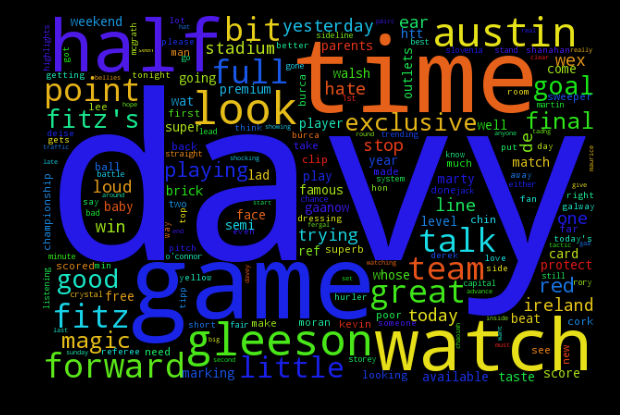

In [27]:
#Word cloud
plt.figure(facecolor='k')
plt.imshow(wordcloud1)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()
plt.savefig("wexvwat.png")